In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def load_and_convert_to_grayscale(image_path):
    image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return grayscale_image

In [3]:
def apply_morphology_operations(image, kernel_size=(5,5), iterations=1):
    kernel = np.ones(kernel_size, np.uint8)

    dilation = cv2.dilate(image, kernel, iterations=iterations)
    erosion = cv2.erode(image, kernel, iterations=iterations)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=iterations)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel, iterations=iterations)
    white_tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel, iterations=iterations)
    
# Mostrar imágenes
    plt.figure(figsize=(15, 5))
    
    plt.subplot(151), plt.imshow(image, cmap='gray'), plt.title('Original')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(152), plt.imshow(dilation, cmap='gray'), plt.title('Dilatación')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(153), plt.imshow(erosion, cmap='gray'), plt.title('Erosión')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(154), plt.imshow(opening, cmap='gray'), plt.title('Opening')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(155), plt.imshow(closing, cmap='gray'), plt.title('Closing')
    plt.xticks([]), plt.yticks([])

    plt.show()

    # Mostrar White Top Hat por separado
    plt.figure(figsize=(7, 5))
    plt.imshow(white_tophat, cmap='gray')
    plt.title('White Top Hat')
    plt.xticks([]), plt.yticks([])
    plt.show()

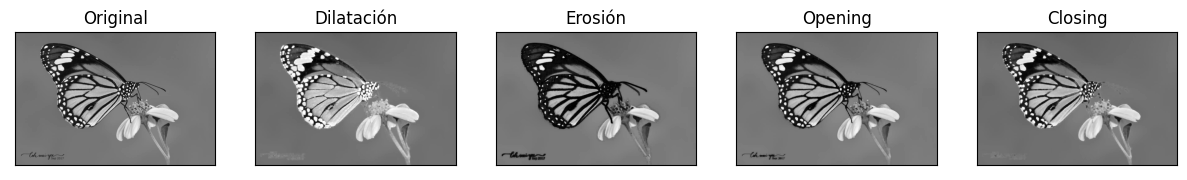

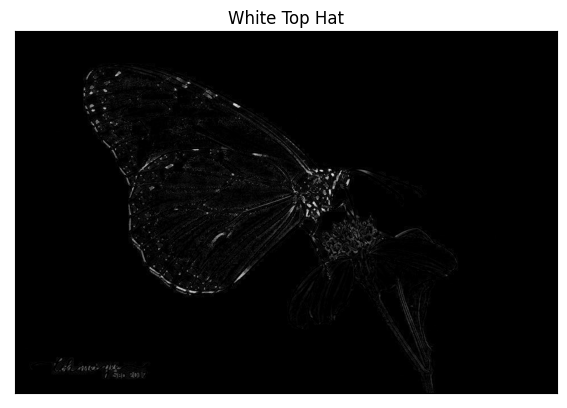

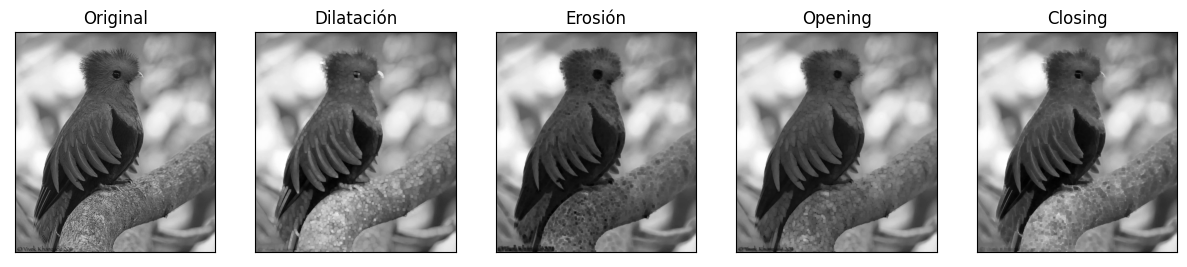

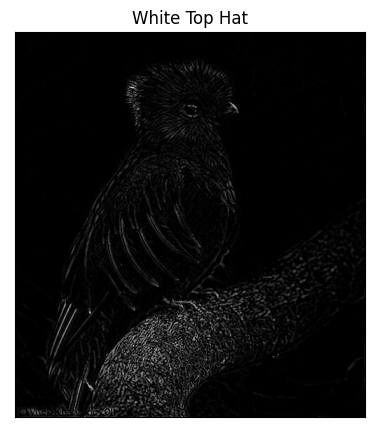

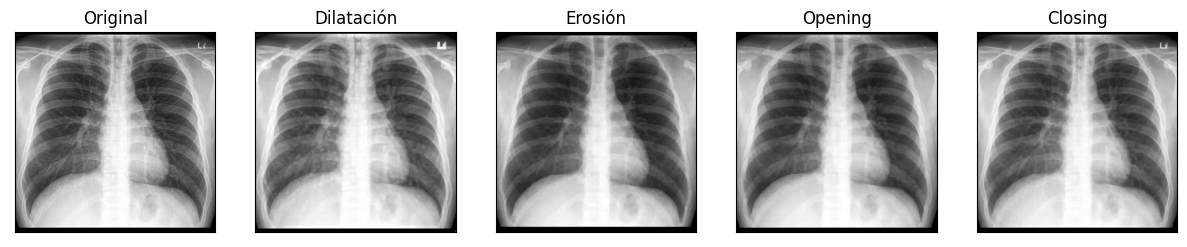

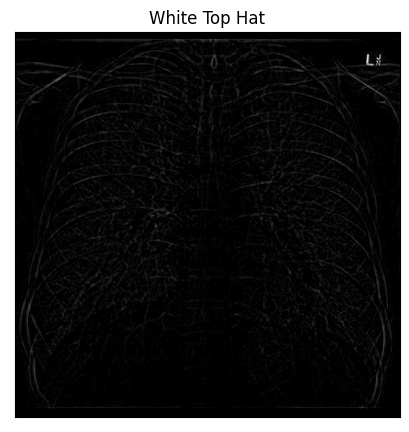

In [4]:
butterfly_path = 'assets/butterfly.jpeg'
quetzalgris_path = 'assets/quetzalgris.png'
chestXray_path = 'assets/chestXray.jpeg'

# Cargar y convertir a escala de grises
butterfly_img = load_and_convert_to_grayscale(butterfly_path)
quetzalgris_img = cv2.imread(quetzalgris_path, cv2.IMREAD_GRAYSCALE)
chestXray_img = cv2.imread(chestXray_path, cv2.IMREAD_GRAYSCALE)

# Aplicar operaciones morfológicas a cada imagen
apply_morphology_operations(butterfly_img)
apply_morphology_operations(quetzalgris_img)
apply_morphology_operations(chestXray_img)

# Explicar
#### •¿Cuál es el efecto de aplicar dilatación y erosión a estas imágenes? 
##### La dilatación es un proceso que amplía las estructuras en una imagen, mientras que la erosión reduce o elimina estas mismas estructuras. Al aplicar dilatación, esta amplía las regiones con píxeles oscuras de las imagenes, mientras que erosión reduce o elimina estas áreas.

#### •¿Cuál es el efecto de aplicar opening y closing a estas imágenes?
##### Se puede observar en las imagenes, que algunos detalles que están muy juntos en el opening, los separa, mientras que en el closing se ven más juntos. Además, los bordes en el opoening pueden ser un poco más delgados que en el closing.

#### •¿Quée hace el white top-hat? ¿Para qué puede ser  útil?
##### Lo que hace esta es de que resalta las regiones que son más brillantes que el fondo, y que se puede decir, se han mantenido después de aplicar el opening. Esta función puede ser útil para resaltar detalles sutiles de la imagen a la que se le está aplicando, que pueden resultar siendo información importante.